<a href="https://colab.research.google.com/github/uraimov92cnu/YoloV8_object-detection/blob/main/Copy_of_YoloV8_custom_object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **YOLOV8 Iris and Pupil Detetcion**



This notebook explains training custom YOLOv8 model for object detection. I am using "Face Mask Dataset" from kaggle which is already available in yolo format. 
https://universe.roboflow.com/new-workspace-0xdgg/iris_120_set/browse?queryText=&pageSize=50&startingIndex=0&browseQuery=true


This is a initial version of custom trianing with YOLOv8.
Currently YOLOv8 is the newest state-of-the-art YOLO model that can be used for object detection, image classification, and instance segmentation tasks.


  I am using Google Colab for trianing. If you are intrested to check custom trianing with YOLOv8, please follow this link


### **1. Setting Up Google Colab**

Google Colab is an online environment similar to Jupiter notebook where you can train deep learning models on GPU/*TPU*. The free plan of Google Colab allows you to train the deep learning model for up to 12 hrs before the runtime disconnects. By visiting the runtime section change run type to GPU.

In [1]:
# to check and monitoring of NVIDIA GPU devices. 
!nvidia-smi 

Tue Mar 14 00:45:35 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    24W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### **2. YOLOV8 Installation:**
We used to clone the repo or use torchhub to work with Yolov5. The recent YoloV8 has been released as pip package, so we don't need to clone any repo. This package alone installs ever dependency for yolov8.

The Pip install of the ultralytics package including all requirements.txt in a Python>=3.7.0 environment, including PyTorch>=1.7.


In [2]:
# installing package to work with yolov8
!pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 496.5/496.5 KB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 11.4 MB/s eta 0:00:00


### **3. Mounting Google Drive**

I have uploaded mask_dataste folder to Google drive in the 'MyDrive/datasets/mask_dataset/' path, I will mount drive using the below code. (It will ask you to enter the authorization code that you can by clicking the link that will appear below). The annotated data has been divided in such a way that the images and the labels (text files) are separate.

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
# check the uploaded data in drive
!ls '/content/drive/MyDrive/cataract/iris_120_set.v7i.yolov8'
!ls '/content/drive/MyDrive/cataract/iris_120_set.v7i.yolov8/train/'

data.yaml		   README.roboflow.txt
eye_images		   test
iris_pupil_detection.yaml  train
README.dataset.txt	   valid
README.md		   YoloV8_custom_object_detection.ipynb
images	labels	labels.cache


### **YOLOV8 format:**

The format for Yolov8 is same as Yolov5. The YOLO format, with one .txt file per image (if no objects in image, no .txt file is required). The *.txt file specifications are:

One row per object Each row is class x_center y_center width height format.

Box coordinates must be in normalized xywh format (from 0 - 1). If your boxes are in pixels, divide x_center and width by image width, and y_center and height by image height. Class numbers are zero-indexed (start from 0).

In [5]:
# Checking the size of images and displaying them
import numpy as np
import cv2
# Image shape in Training
image = cv2.imread('/content/drive/MyDrive/cataract/iris_120_set.v7i.yolov8/test/images/56_jpg.rf.6be67f06610c14027420f8cf7adb1778.jpg')
#print(image)
height = np.size(image, 0)
width = np.size(image, 1)
print ("shape of the training image {}, {}".format(height, width))
# Image shape in validation
image = cv2.imread('/content/drive/MyDrive/cataract/iris_120_set.v7i.yolov8/valid/images/162_jpg.rf.b482422ba575cf9c4e91a69f423e6f77.jpg')
height = np.size(image, 0)
width = np.size(image, 1)
print ("shape of the validation image {}, {}".format(height, width))

shape of the training image 240, 320
shape of the validation image 240, 320


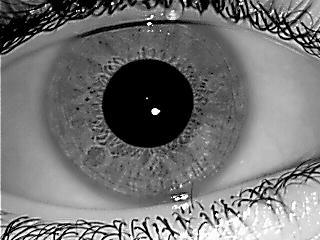

In [6]:
# dispying with different width
from IPython.display import Image 
Image(filename='/content/drive/MyDrive/cataract/iris_120_set.v7i.yolov8/valid/images/162_jpg.rf.b482422ba575cf9c4e91a69f423e6f77.jpg', width=300) 

### **4. Create face_mask_detetcion.yaml (dataset config file)**

"face mask dataste" is having the images are split as follows:
Train: 990 = 70%
Valid: 294 = 20%
Test: 136 =10% (I am not using test datatset, instaed i will test with soem video from the internet)
Total = 1420 images

mask_dataset/face_mask_detetcion.yaml, created below, is the dataset config file that defines:

the dataset root directory path and relative paths to train / val / test image directories (or *.txt files with image paths)

nc: the number of classes

names: a list of class names

In [7]:

# I will write the contents of the cell to a file
%%writefile /content/drive/MyDrive/cataract/iris_120_set.v7i.yolov8/iris_pupil_detection.yaml 

# Train/val/test sets as 1) dir: path/to/imgs, 2) file: path/to/imgs.txt, or 3) list: [path/to/imgs1, path/to/imgs2, ..]
path: /content/drive/MyDrive/cataract/iris_120_set.v7i.yolov8 # dataset root dir
train: train/images/ # train images (relative to 'path')
val: valid/images/ # val images (relative to 'path')
test: test/images/ # test images (optional)

# number of classes
nc: 3

# class names
names: ['0', '1', '2']
#names: [ 'no_mask', 'mask','improper_mask']  # class names


Overwriting /content/drive/MyDrive/cataract/iris_120_set.v7i.yolov8/iris_pupil_detection.yaml


### **5. Training Our Custom Face Mask Detetcion Model:**

I am using a YOLOv8m pretrained model for custom training with my dataset.

Parameters:
*   specify the path to the data configuration file
*   specify a path to weights to start transfer learning from. yolov8m.pt (starting from Pretrained weights)
*   input image size
*   Size of a batch (model weights are updated with each batch).
*   No of epochs.

It will cache images for faster training, cache images in "ram" (default) or "disk

In [8]:
#!pip install ultralytics
from ultralytics import YOLO

# Load a model
# model = YOLO("yolov8m.yaml")  # build a new model from scratch
model = YOLO("yolov8m.pt")  # load a pretrained model (recommended for training)

# Use the model
results = model.train(data="/content/drive/MyDrive/cataract/iris_120_set.v7i.yolov8/iris_pupil_detection.yaml", epochs=100, imgsz=256)  # train the model

  0%|          | 0.00/49.7M [00:00<?, ?B/s]

Ultralytics YOLOv8.0.53 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/drive/MyDrive/cataract/iris_120_set.v7i.yolov8/iris_pupil_detection.yaml, epochs=100, patience=50, batch=16, imgsz=256, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=F

  0%|          | 0.00/755k [00:00<?, ?B/s]

Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.Conv                  [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.Conv                  [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.C2f                   [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.Conv                  [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.C2f                   [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.Conv                  [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.C2f                   [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

  0%|          | 0.00/6.23M [00:00<?, ?B/s]

AMP: checks passed ✅
optimizer: SGD(lr=0.01) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias
train: Scanning /content/drive/MyDrive/cataract/iris_120_set.v7i.yolov8/train/labels.cache... 5205 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5205/5205 [00:00<?, ?it/s]
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
val: Scanning /content/drive/MyDrive/cataract/iris_120_set.v7i.yolov8/valid/labels.cache... 290 images, 0 backgrounds, 0 corrupt: 100%|██████████| 290/290 [00:00<?, ?it/s]
Plotting labels to runs/detect/train/labels.jpg... 
Image sizes 256 train, 256 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      1/100      1.51G     0.7578     0.8371      1.101         49        256: 100%|██████████| 326/326 [

while training , I have observed some error. I think it is related to some plotting, so I have raised a issue yolov8 repo. Below is the link to track.
https://github.com/ultralytics/ultralytics/issues/337

### **Val:**

Validate trained YOLOv8n model accuracy on the validatio dataset. No argument need to passed as the model retains it's training data and arguments as model attributes.

In [11]:
results = model.val()  # evaluate model performance on the validation set

Ultralytics YOLOv8.0.53 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
val: Scanning /content/drive/MyDrive/cataract/iris_120_set.v7i.yolov8/valid/labels.cache... 290 images, 0 backgrounds, 0 corrupt: 100%|██████████| 290/290 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:06<00:00,  2.86it/s]
                   all        290       1084      0.717       0.74      0.703      0.641
                     0        290        287       0.98      0.993      0.989      0.945
                     1        290        290      0.977      0.993      0.988       0.94
                     2        290        507      0.195      0.235      0.131     0.0371
Speed: 0.3ms preprocess, 4.7ms inference, 0.0ms loss, 4.1ms postprocess per image
Results saved to runs/detect/val2


### **Metrics:**
The trainig mAP per class and over all is good and testing results on video are also good. If we train for epochs, adding more data and playing with hyperparameters can improve performance of the model.

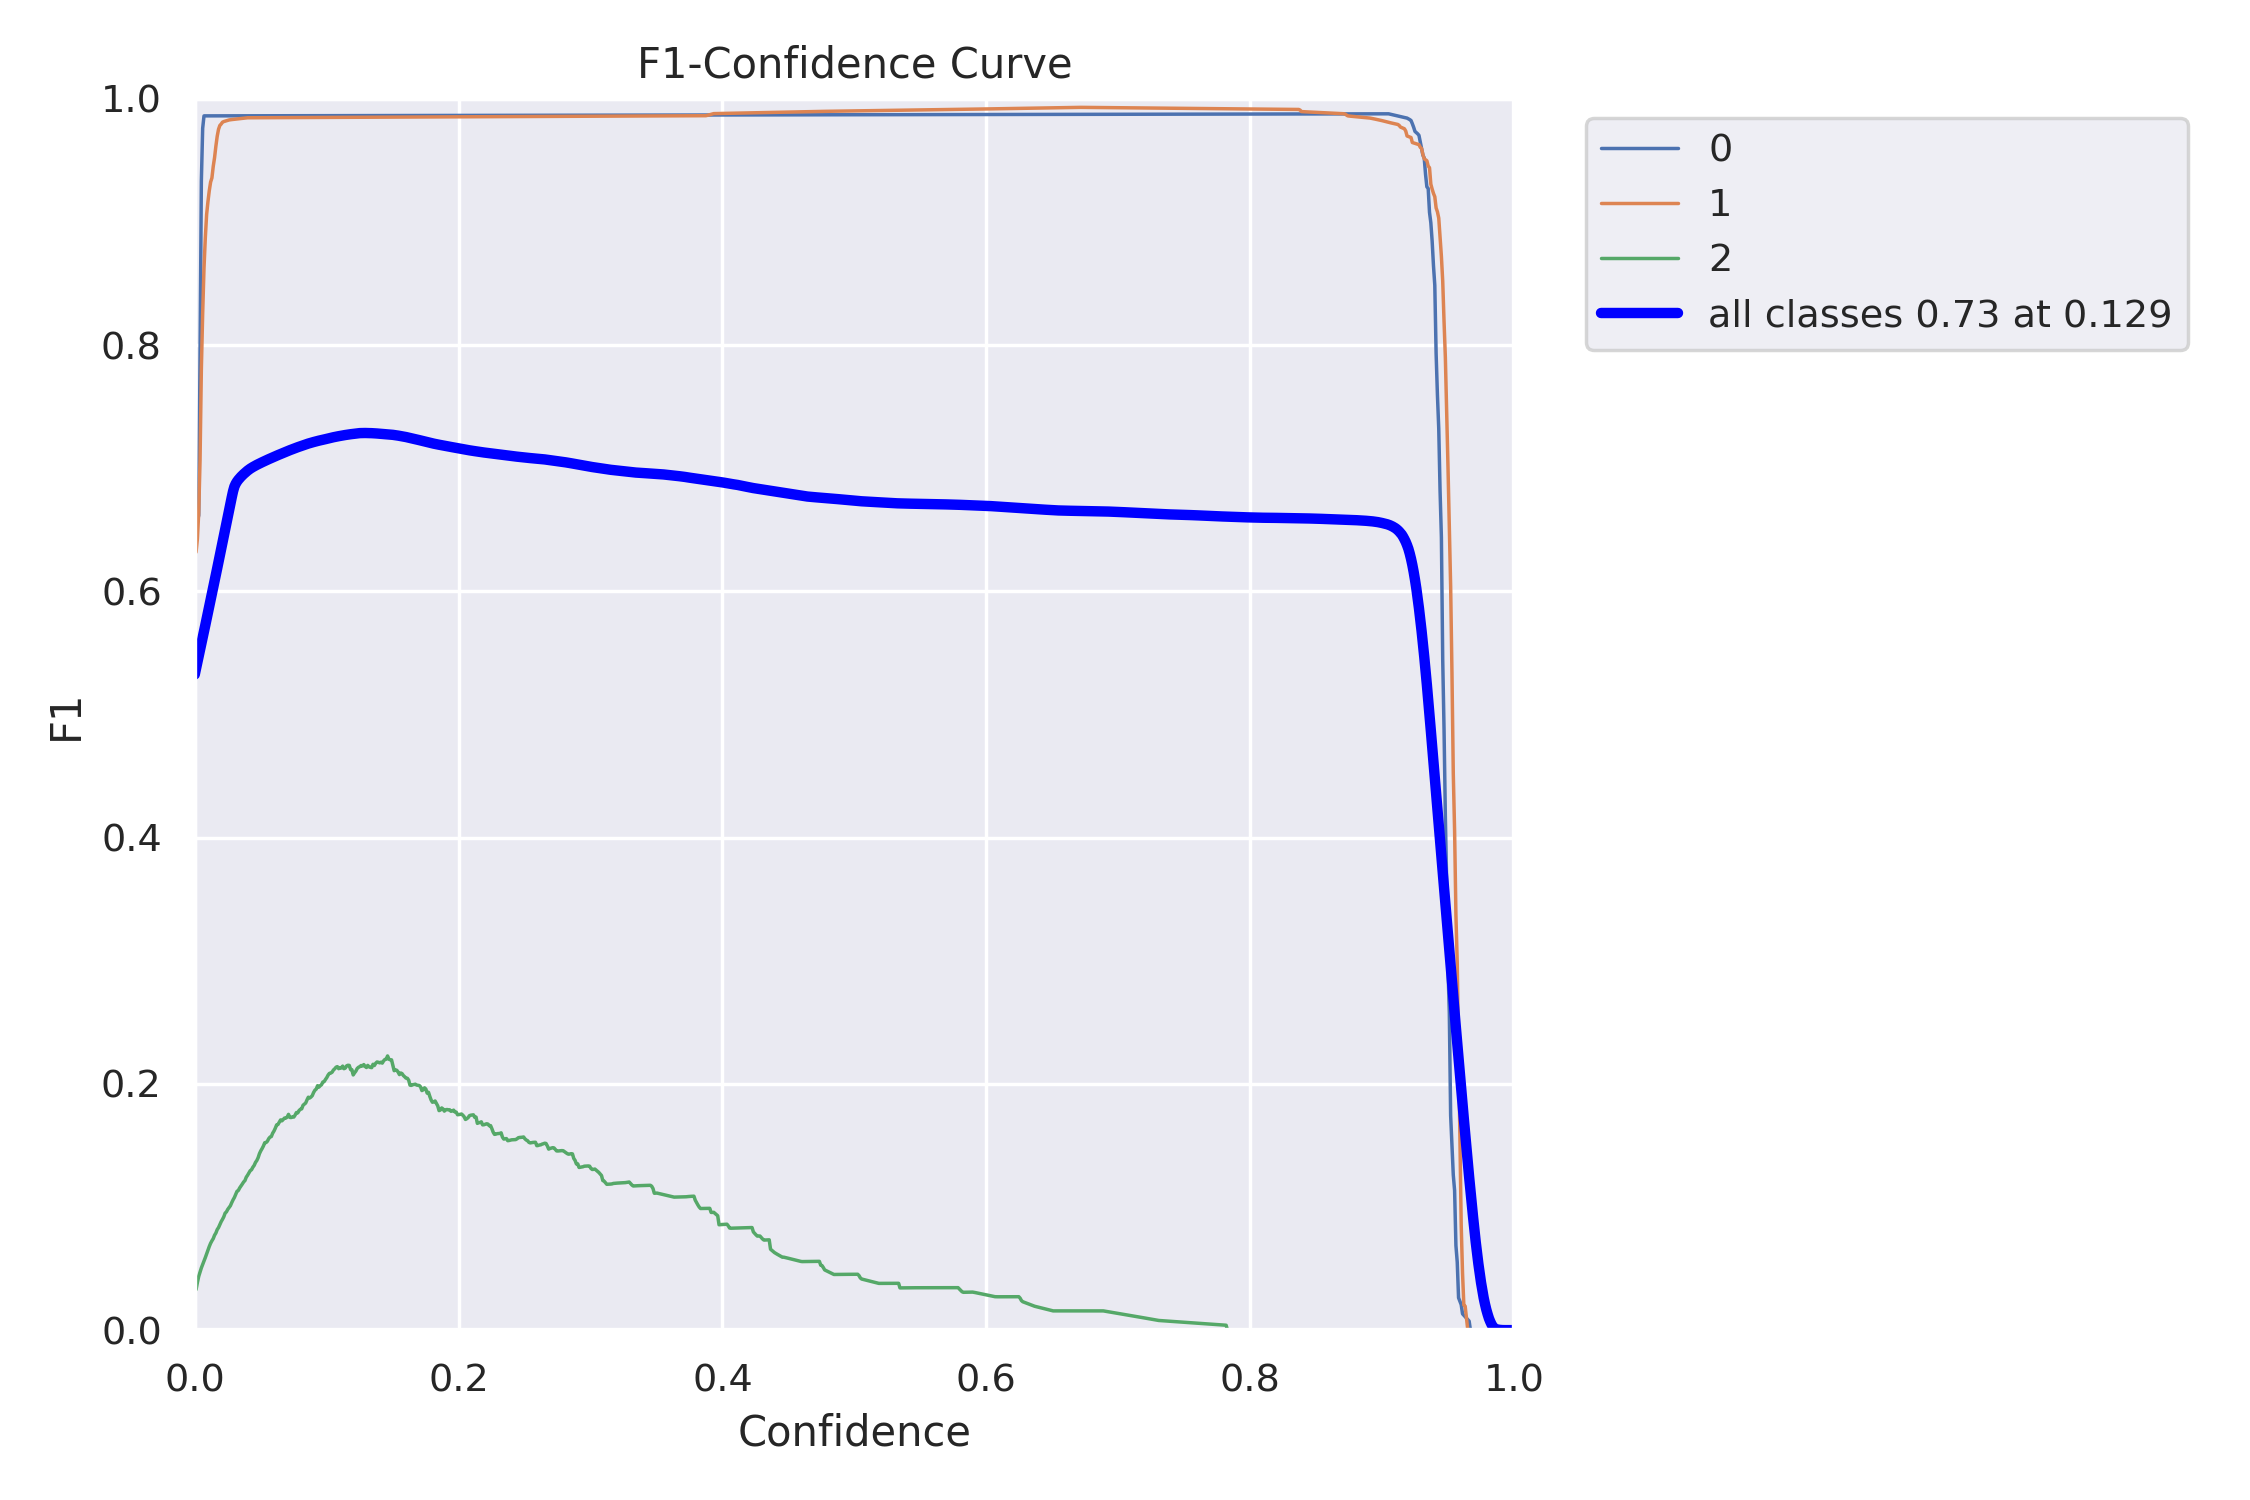

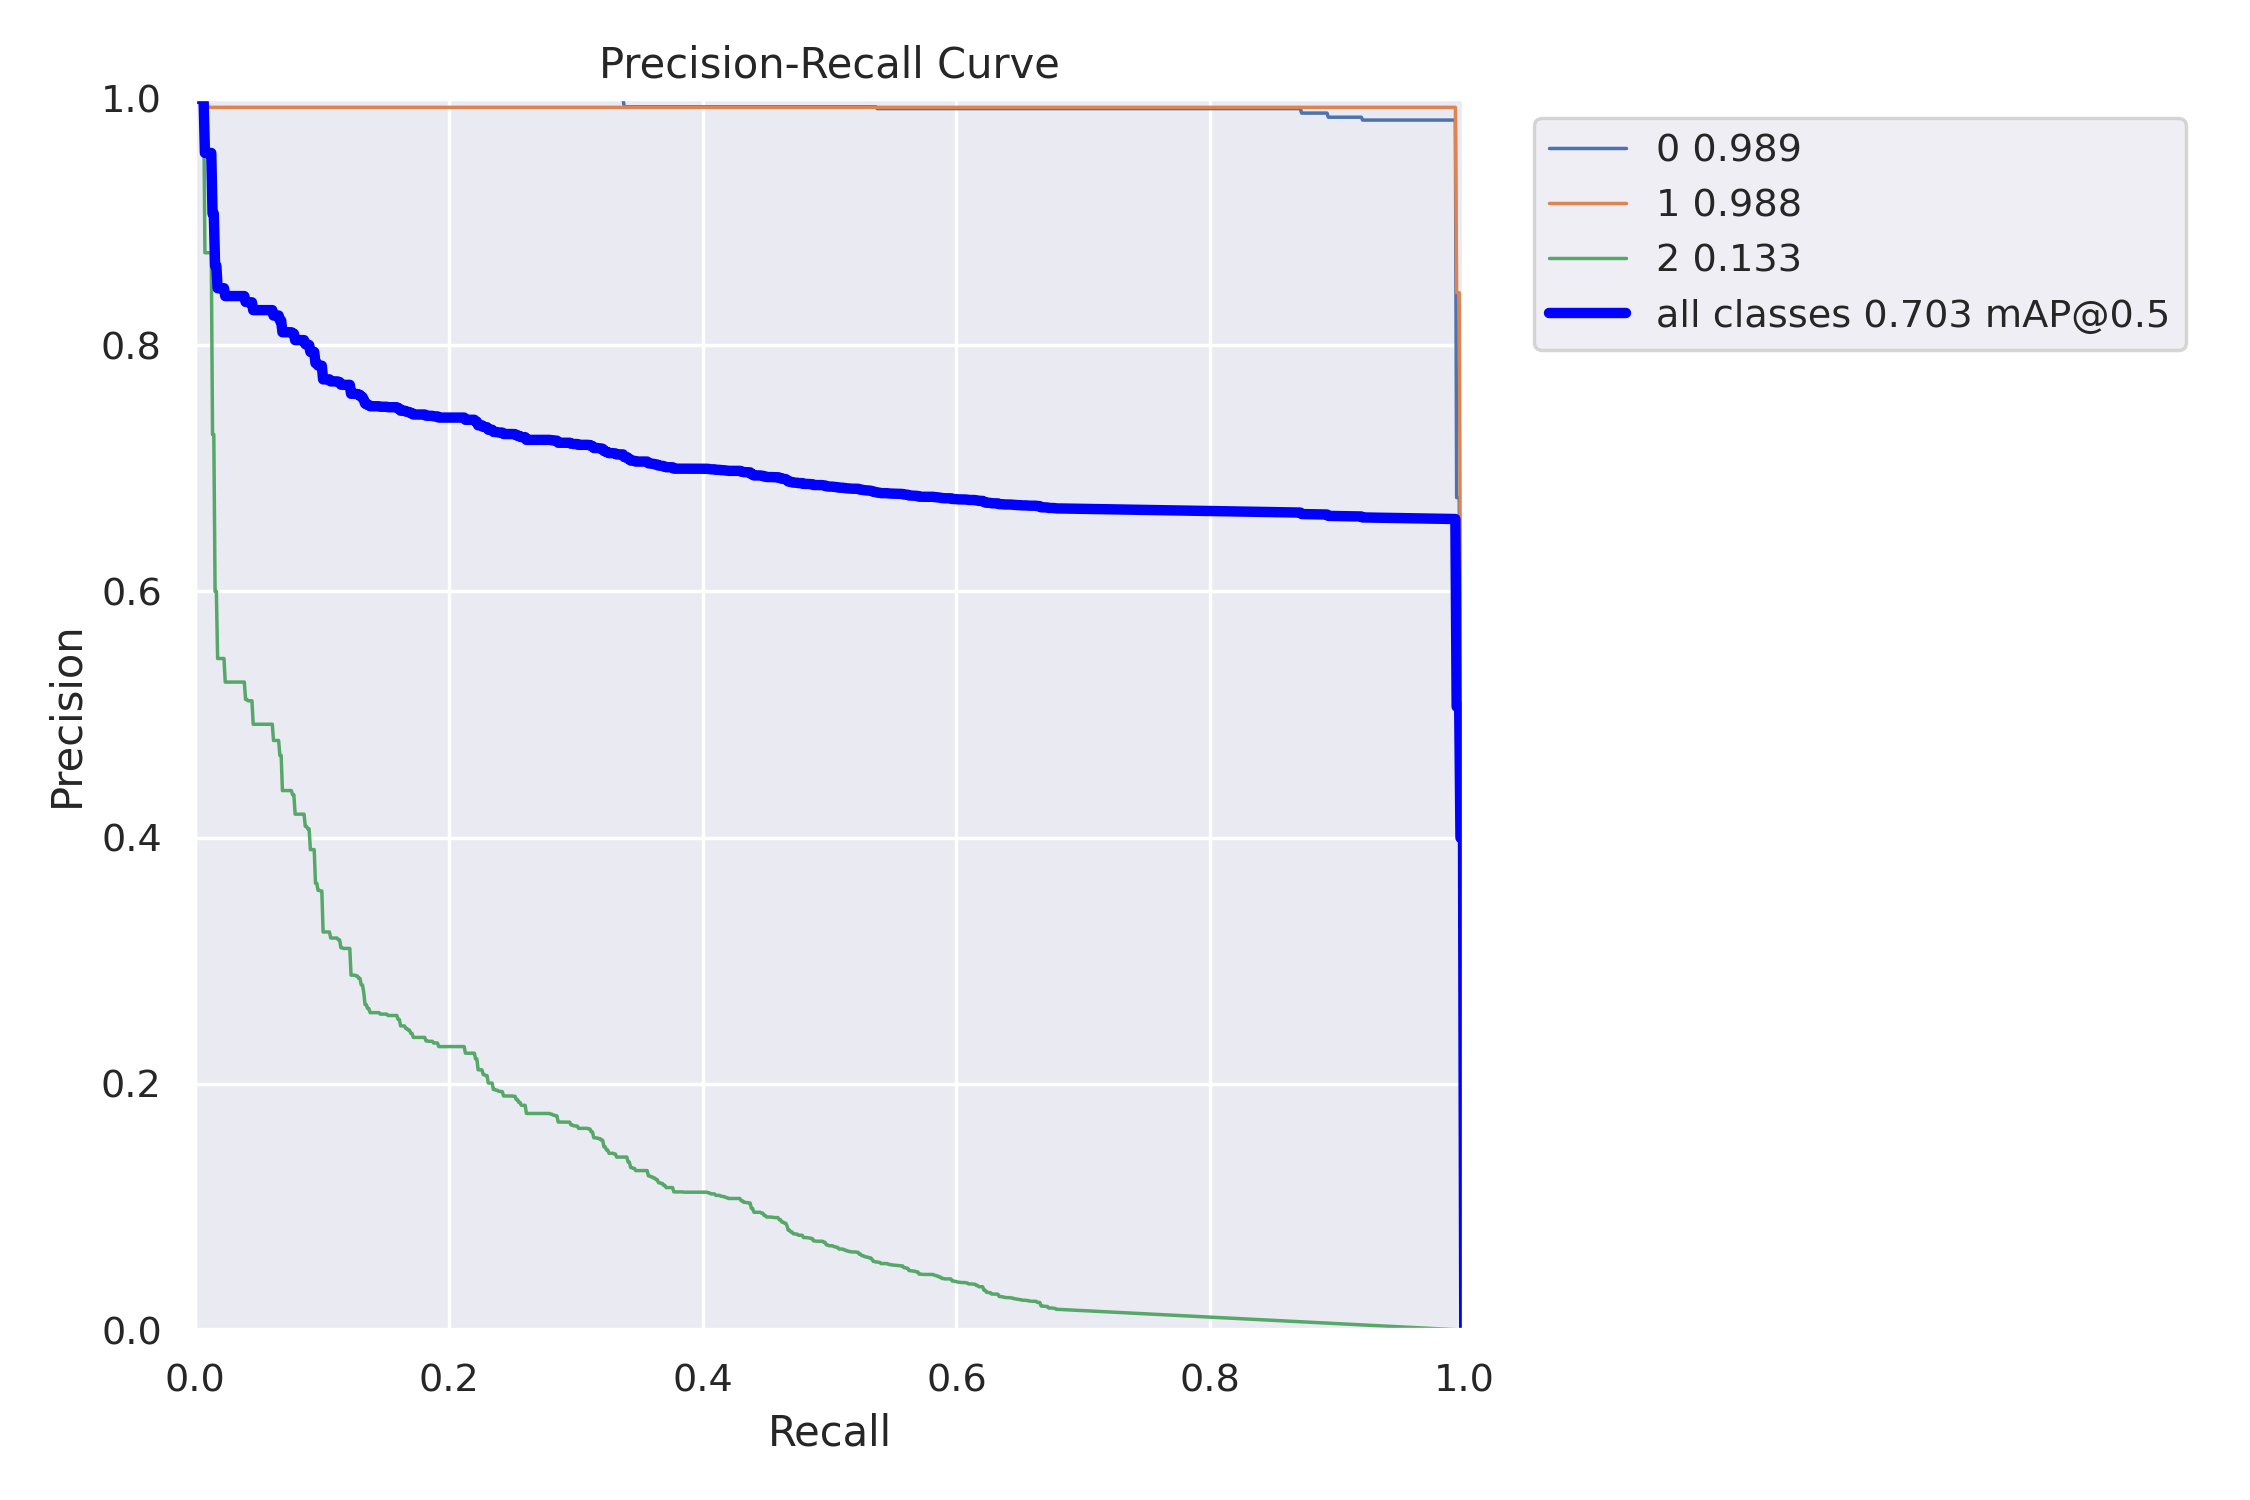

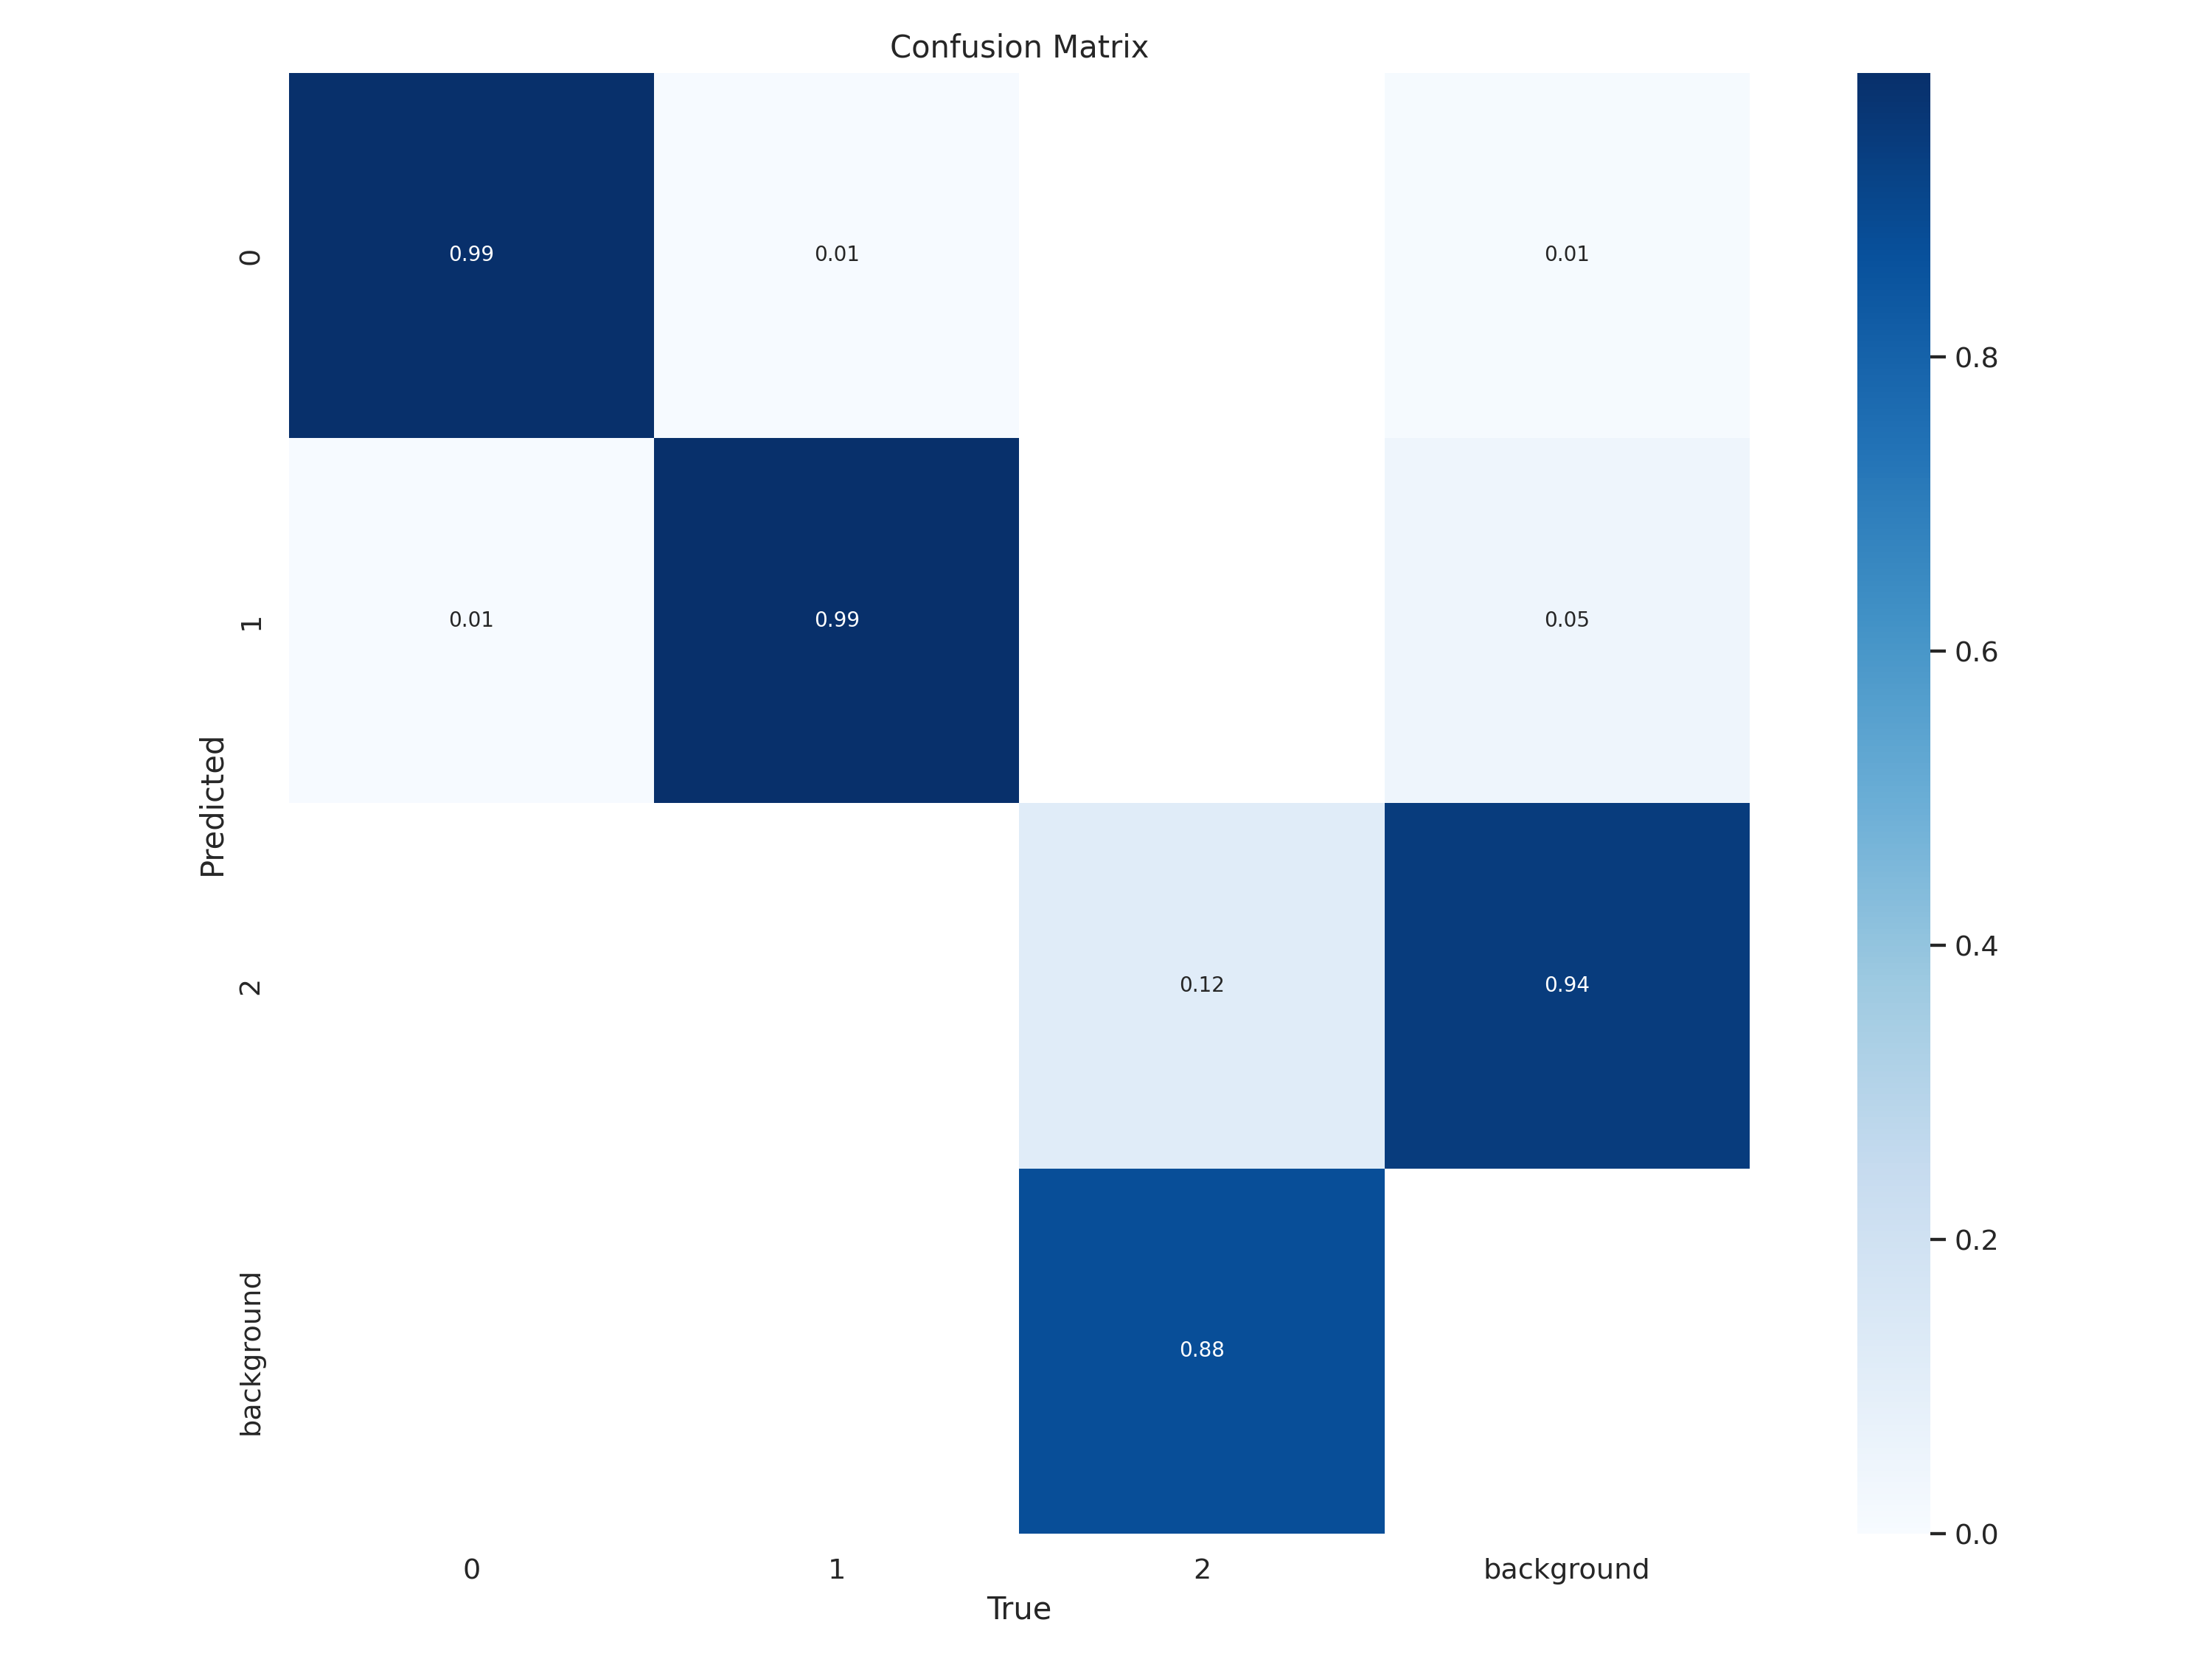

In [13]:
# dislaying metrics for train data
from IPython.display import Image
from IPython.display import display
x = Image(filename='runs/detect/train/F1_curve.png') 
y = Image(filename='runs/detect/train/PR_curve.png') 
z = Image(filename='runs/detect/train/confusion_matrix.png') 
display(x, y,z)

### **Inference:**


In [14]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding
# checking the latest trained files
!ls 'runs/detect/train/weights'

best.pt  last.pt


In [15]:
# loading the trianed model
model = YOLO("runs/detect/train/weights/best.pt")  # load a custom model

In [20]:
# testing the model on a video
# results = model("/content/drive/MyDrive/datasets/mask_dataset/mask_testing.mp4") 
!yolo task=detect mode=predict model="runs/detect/train/weights/best.pt" source="/content/drive/MyDrive/cataract/iris_120_set.v7i.yolov8/eye_images/severe_gray.jpg" save=True

Ultralytics YOLOv8.0.53 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25841497 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/cataract/iris_120_set.v7i.yolov8/eye_images/severe_gray.jpg: 192x256 1 0, 31.6ms
Speed: 0.6ms preprocess, 31.6ms inference, 3.1ms postprocess per image at shape (1, 3, 256, 256)
Results saved to runs/detect/predict3


In [18]:
# testing the model on a video
# results = model("/content/drive/MyDrive/datasets/mask_dataset/mask_testing.mp4") 
!yolo task=detect mode=predict model="runs/detect/train/weights/best.pt" source="/content/drive/MyDrive/cataract/iris_120_set.v7i.yolov8/eye_images/eye_cataract.mp4" save=True

Ultralytics YOLOv8.0.53 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25841497 parameters, 0 gradients, 78.7 GFLOPs

video 1/1 (1/1047) /content/drive/MyDrive/cataract/iris_120_set.v7i.yolov8/eye_images/eye_cataract.mp4: 192x256 1 0, 1 1, 17.8ms
video 1/1 (2/1047) /content/drive/MyDrive/cataract/iris_120_set.v7i.yolov8/eye_images/eye_cataract.mp4: 192x256 1 0, 1 1, 14.0ms
video 1/1 (3/1047) /content/drive/MyDrive/cataract/iris_120_set.v7i.yolov8/eye_images/eye_cataract.mp4: 192x256 1 0, 1 1, 13.5ms
video 1/1 (4/1047) /content/drive/MyDrive/cataract/iris_120_set.v7i.yolov8/eye_images/eye_cataract.mp4: 192x256 1 0, 1 1, 13.4ms
video 1/1 (5/1047) /content/drive/MyDrive/cataract/iris_120_set.v7i.yolov8/eye_images/eye_cataract.mp4: 192x256 1 0, 1 1, 13.5ms
video 1/1 (6/1047) /content/drive/MyDrive/cataract/iris_120_set.v7i.yolov8/eye_images/eye_cataract.mp4: 192x256 1 0, 1 1, 13.3ms
video 1/1 (7/1047) /content/drive/MyDrive/cataract/iris_1

### **Conclusion:**
Based on the inference results, the trained model is doing a great job. We can still imrpove it by using large yolov8 models, additional data and hyperparameter changes. 

### **References:**

1.https://github.com/ultralytics/ultralytics

2.https://docs.ultralytics.com/tasks/detection/

3.https://www.kaggle.com/datasets/maalialharbi/face-mask-dataset?resource=download